# IPBME6UE: Problem Set 2 - Medical Image Processing

## Spring 2024

## Group Members

**Person 1:**

YOUR NAME HERE

**Person 2:**

YOUR NAME HERE

**Person 3:**

YOUR NAME HERE

### Welcome to Problem Set 2!

In this problem set, we will be exploring some fundamental concepts in digital image processing. We will be also be doing some math! Luckily, iPython notebooks have the additional ability of interpreting LaTeX ($\LaTeX$) for typesetting mathematical expressions. For example:

$$ f(t)*g(t) = \int_{-\infty}^{\infty} f(\tau)g(t-\tau)d\tau $$

This says that a convolution is defined as the integral of the product of the two functions after one is reversed and shifted. Note the word reversed, as in the kernel is mirrored along both axes. Here's another example:

$$y(x) = \frac{\sum_{i=2}^{i=3} x^i}{M}$$

This says nothing meaningful. ¯\\_(ツ)_/¯

If you are not familiar with $\LaTeX$, don't worry! You can learn it very quickly just by doing this assignment. If you are looking for more practice, try some of [these](http://www.personal.ceu.hu/tex/cookbook.html) examples out.

## Setup

We start by importing the packages we will be working with.


In [1]:
pip install nibabel


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import nibabel as nib

from pathlib import Path
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (20, 10)

Got an error during the import?

Try installing the missing packages - you can do it even from within the notebook by typing in a cell the command with a preceding `!`

* [PIL](https://pillow.readthedocs.io/en/stable/installation.html) -  `!pip install Pillow`
* [skimage](https://scikit-image.org/docs/stable/install.html) - `!pip install scikit-image`
* [nibabel](https://nipy.org/nibabel/installation.html) - `!pip install nibabel`

Please ensure that you have the data folder from the zipped file.
If needed, set the path properly here:

In [3]:
##### IMPORTANT!!! ####
# Change this to be your unzipped data folder:
data_folder = Path('C:/Users/chjul/Documents/sem6/Image_Processing/Exercise_2')

assert data_folder.exists()

## Problem 1: Linear (& Non-Linear) Filtering (25 points) 

**a.** Image matrix $A$ consists of a small diamond surrounded by a layer of zeros. Compute the 2D convolution between image matrix $A$ and filter kernel $K$. The output image will be the same shape as the input image, so you can assume a single zero padding layer on each side of the image.

We have given you the image matrix $A$ and the filter kernel $K$ in the cell below. 

First, do this 2D convolution by hand (to get a better understanding of what is happening there). Then, check your answer in the cell below that. 

*Hint: you may find a particular function in the `scipy.signal` package helpful for this task.*

In [4]:
matA = np.array([[0., 0., 0., 0., 0.],
                 [0., 0., 1., 0., 0.],
                 [0., 1., 0., 1., 0.],
                 [0., 0., 1., 0., 0.],
                 [0., 0., 0., 0., 0.]])

kerK = np.array([
                 [1., 1., 1.],
                 [1., 1., 1.],
                 [1., 1., 1.],
                ])


In [5]:
####### WRITE YOUR CODE TO APPLY MATRIX A WITH THE FILTER KERNEL K IN HERE. ##########################
####### You can have up to 2 cells for this question, but only one is required #######################
import numpy as np
from scipy.signal import convolve2d

# Perform 2D convolution using scipy.signal.convolve2d
result = convolve2d(matA, kerK, mode='same')

# Print the result
print(result)


######################################################################################################

[[0. 1. 1. 1. 0.]
 [1. 2. 3. 2. 1.]
 [1. 3. 4. 3. 1.]
 [1. 2. 3. 2. 1.]
 [0. 1. 1. 1. 0.]]


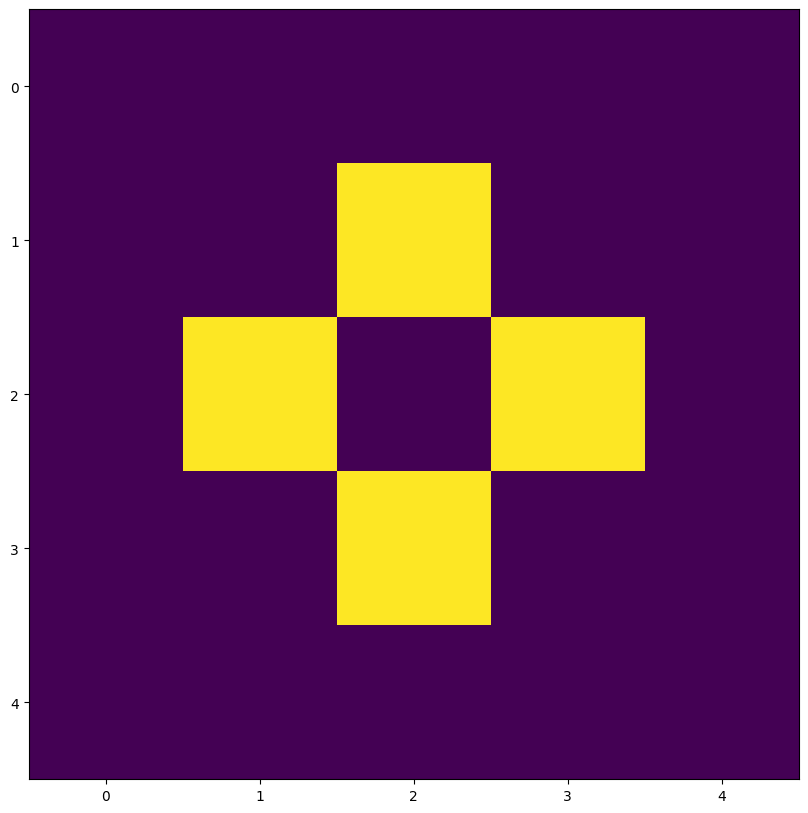

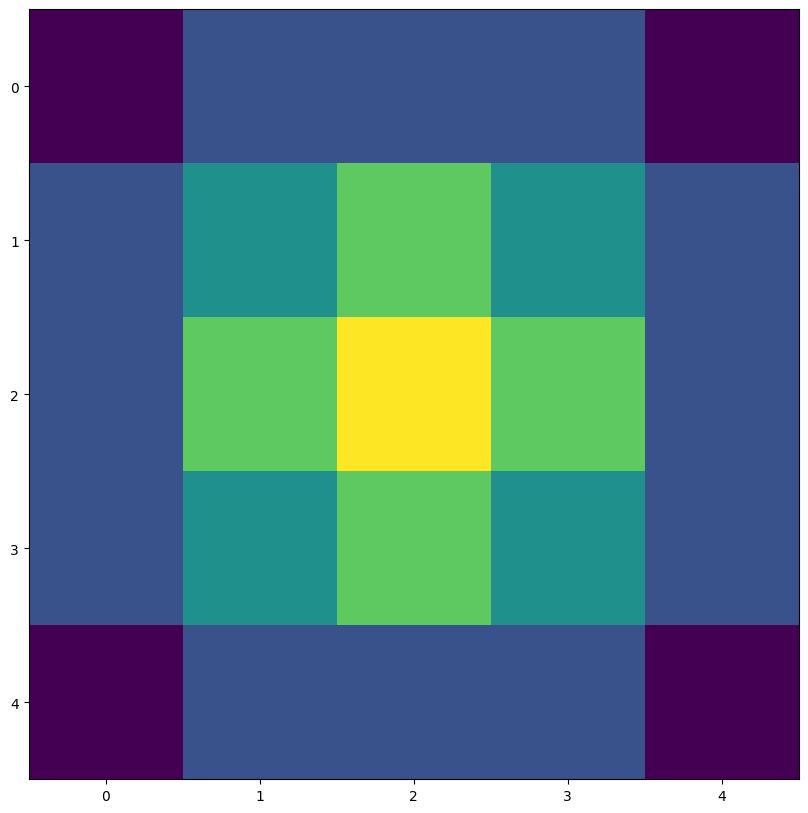

In [6]:
plt.imshow(matA)
plt.show()
plt.imshow(result)
plt.show()

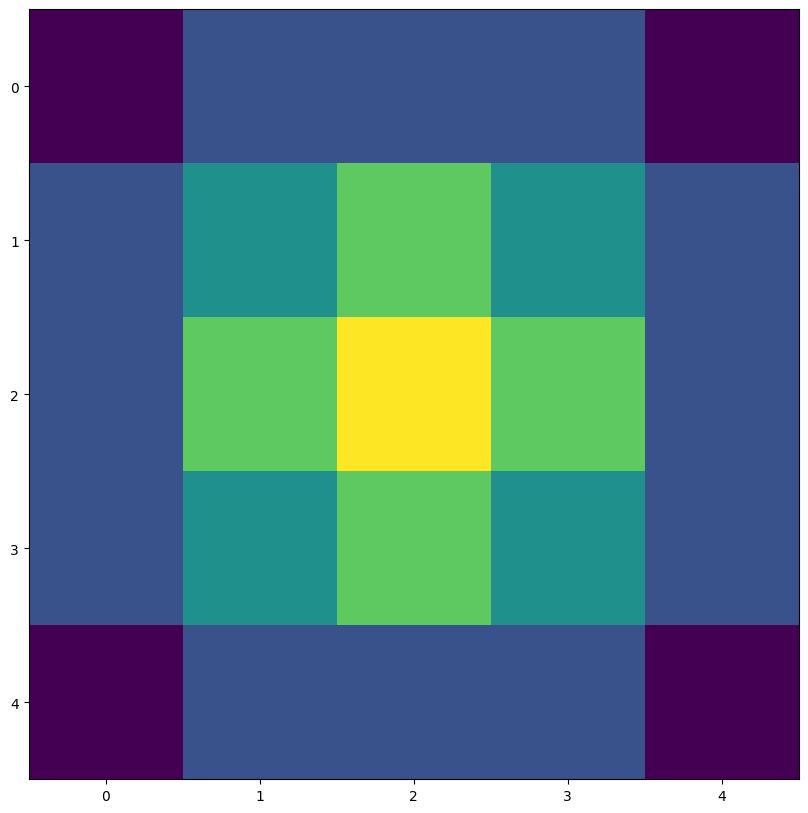

array([[0.        , 0.11111111, 0.11111111, 0.11111111, 0.        ],
       [0.11111111, 0.22222222, 0.33333333, 0.22222222, 0.11111111],
       [0.11111111, 0.33333333, 0.44444444, 0.33333333, 0.11111111],
       [0.11111111, 0.22222222, 0.33333333, 0.22222222, 0.11111111],
       [0.        , 0.11111111, 0.11111111, 0.11111111, 0.        ]])

In [7]:
plt.imshow(result / np.sum(kerK))
plt.show()

result / np.sum(kerK)

**b.** How does the output matrix compare to the original image matrix $A$? 

What type of filter is kernel $K$ acting as? 
Alternatively, if you divide the output image by `np.sum(kerK)`, what have you essentially done to the image?

**Answer:** 
The Result matrix has higher values concentrated around the center and gradually decreases towards the edges. The kernel 'K' works as a box filter or averaging filter, performing blurring on the image. 

By dividing the output image by np.sum(kerK) it normalizes the image, further scales the image in such a way that the sum of all the pixel values in the output becomes equal to 1.



**c.** Let matrix $O_1$ be the output from the 2D convolution between image matrix $MatC$ and kernel $KerC$. Compute $O_1$. 

The same way that we write out $C$ and $D$ for you, write out the output for us as a **NumPy array**, as in output the matrix $O_1$. You may choose to write out the full convolution (by zero-padding image matrix $C$ and then convolving with kernel $D$) or simply crop the output matrix to be the same size as the input matrix.

In [8]:
# Create image matrix C.
matC = np.zeros((5, 5))
matC[:,[1,3]] = 1

matC

array([[0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.]])

In [9]:
# Create filter kernel C.
kerC = np.array([-1, 0, 1])
kerC = np.expand_dims(kerC, 0)

kerC

array([[-1,  0,  1]])

[[-1.  0.  0.  0.  1.]
 [-1.  0.  0.  0.  1.]
 [-1.  0.  0.  0.  1.]
 [-1.  0.  0.  0.  1.]
 [-1.  0.  0.  0.  1.]]


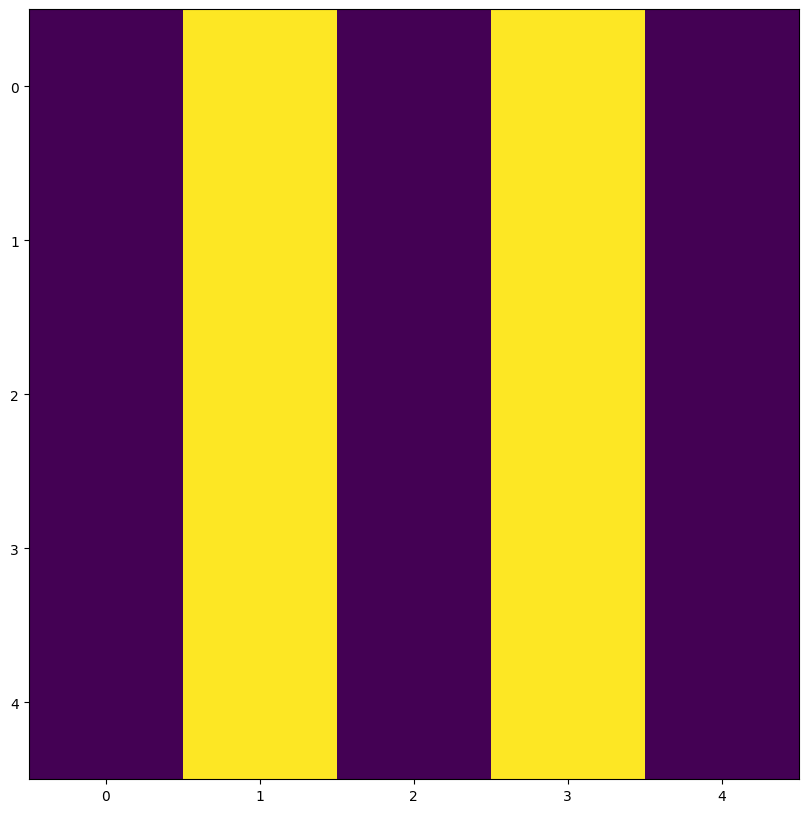

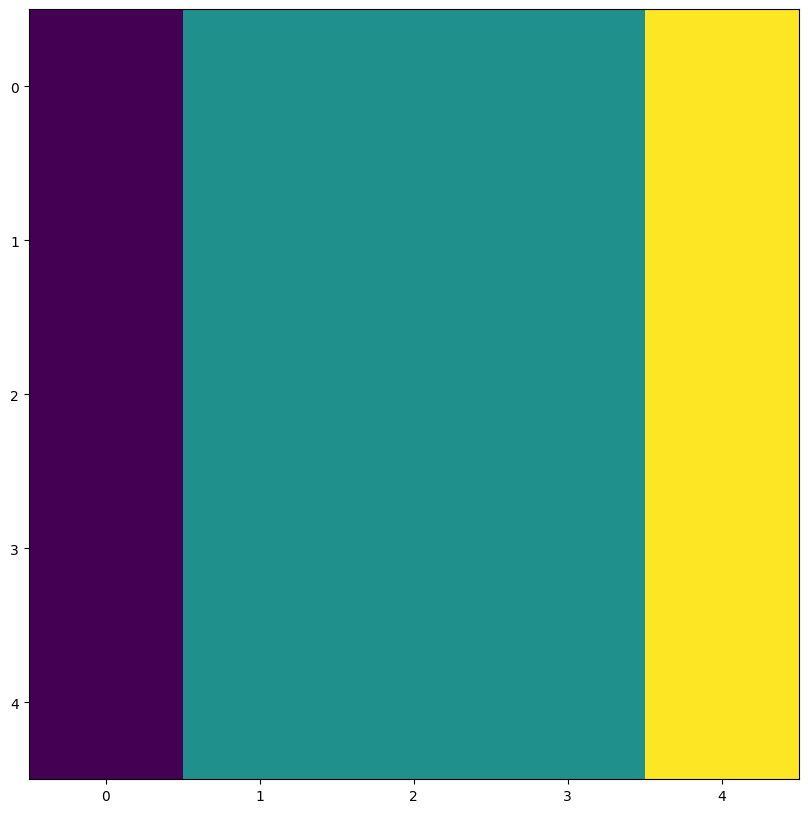

array([[-1.,  0.,  0.,  0.,  1.],
       [-1.,  0.,  0.,  0.,  1.],
       [-1.,  0.,  0.,  0.,  1.],
       [-1.,  0.,  0.,  0.,  1.],
       [-1.,  0.,  0.,  0.,  1.]])

In [10]:
## WRITE NUMPY INITIALIZATION OF MATRIX O1 IN HERE ######

# Perform 2D convolution
O1 = convolve2d(matC, kerC, mode='same')

# Print the output
print(O1)

#########################################################

plt.imshow(matC)
plt.show()
plt.imshow(O1)
plt.show()
O1

**d.** How does the output matrix $O$ compare to the original image matrix $C$?  
In other words, what kind of a filter is kernel $C$?

**Answer:** TThe kernel C is doing a horizontal Sobel edge detection detecting edges in images. Since the image matrix C has no horizontal edges, the output matrix remains zero.

**e.** Convolve image matrix $C$ with kernel $kerE$ to get matrix $O2$. How does $kerE$ differ from $kerC$?  
Try this first by hand, to get a deeper understanding of the process.

In [11]:
print(kerC.T)

[[-1]
 [ 0]
 [ 1]]


In [12]:
# Create filter kernel Ec
kerE = kerC.T

kerE

array([[-1],
       [ 0],
       [ 1]])

In [13]:
# Convolve matC and kerE to make O2.#
# Perform 2D convolution
O2 = convolve2d(matC, kerE, mode='same')
##############################

O2

array([[ 0., -1.,  0., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  1.,  0.]])

**Answer:** The difference between kerE and kerC is in their orientation and the type of gradients or edges they are designed to detect. kerC represents a filter that detects horizontal gradients or edges, while kerE represents a filter that detects vertical gradients or edges.Applying kerC detects horizontal transitions or edges, whereas applying kerE would detect vertical transitions or edges.

**f.** Import your favorite image as a NumPy array. Try to keep it reasonably sized (like 256-by-256) to avoid overly long computation times. If you don’t have a favorite image, you can create a matrix of zeros and ones to form shapes (such as a disk or rectangle).

Apply some additive white Gaussian noise to your image. There are many ways to do this (google it 😉) ), and you should choose your favorite method!  
Next, try to smooth out your noisy image using your favorite linear [smoothing filter](https://docs.opencv.org/3.4/dc/dd3/tutorial_gausian_median_blur_bilateral_filter.html).

Show all three images (the original image, the noisy image, and the smoothed noisy image) side-by-side using `plt.subplots()`.

Play around with the level of noise as well as the smoothing filter parameters.  
At what level of noise can you no longer distinguish the main features of the original image? 

As the level of noise increases, how should you adjust your smoothing filter parameters? What is the main downside to smoothing images?


In [14]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [15]:
import cv2
import numpy as np
from skimage.util import random_noise
from scipy.ndimage import gaussian_filter

from PIL import Image

image_src: str = "Images.tif"
image = np.array(Image.open(image_src).resize((256,256)))

noisy_image = random_noise(image, mode='gaussian', mean=0, var=0.1)
filtered_image = gaussian_filter(noisy_image, sigma=1)


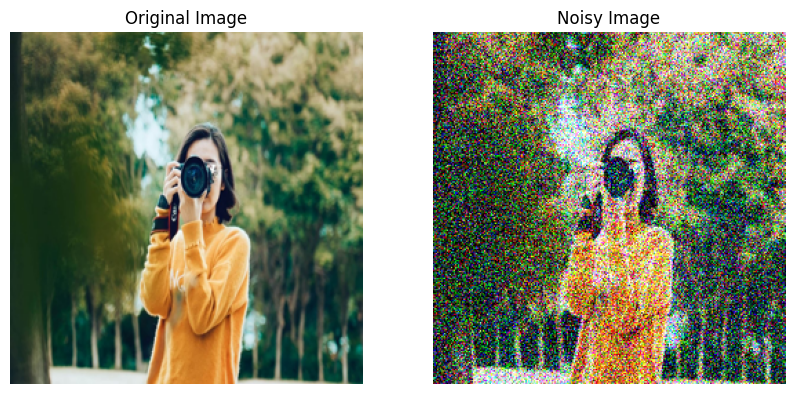

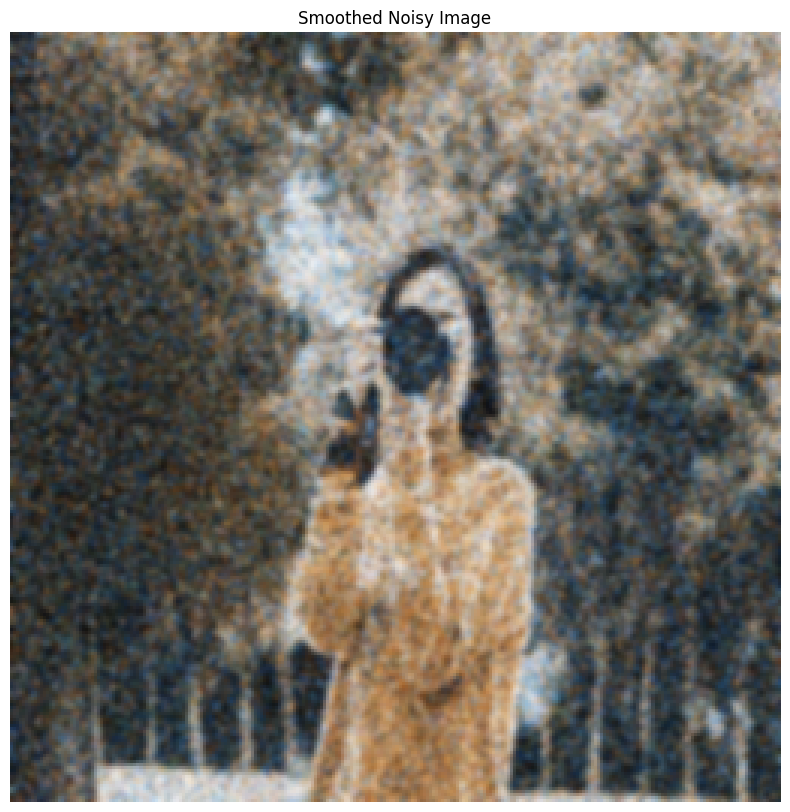

In [16]:
### DISPLAY IMAGES HERE. #############################################################################
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(noisy_image, cmap='gray')
axes[1].set_title('Noisy Image')
axes[1].axis('off')
plt.show()

plt.imshow(filtered_image, cmap='gray')
plt.title('Smoothed Noisy Image')
plt.axis('off')
plt.show()

######################################################################################################

**Answer:** YOUR WRITTEN ANSWER TO QUESTION 1f HERE  

**g.** Try applying a linear edge detection kernel (such as a [central finite difference kernel](https://stackoverflow.com/questions/26694704/2d-image-convolution-central-difference-on-x-gradient) or Sobel operator) to both your original image and the noisy image. How does it do?

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


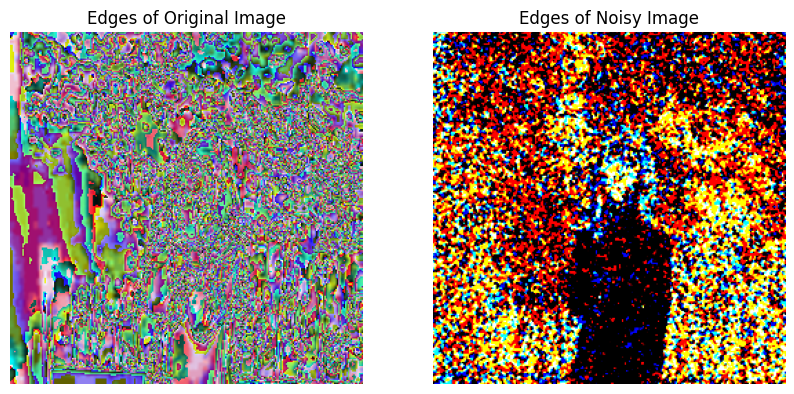

In [18]:
### APPLY THE KERNEL ON YOUR IMAGES HERE. ############################################################
from scipy.ndimage import sobel

edges_original = sobel(image)
edges_noisy = sobel(noisy_image)

# Display the edge-detected images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(edges_original, cmap='gray')
axes[0].set_title('Edges of Original Image')
axes[0].axis('off')
axes[1].imshow(edges_noisy, cmap='gray')
axes[1].set_title('Edges of Noisy Image')
axes[1].axis('off')
plt.show()



######################################################################################################

**Answer:** YOUR WRITTEN ANSWER TO QUESTION 1g HERE  

**h.** Linear [smoothing filters](https://docs.opencv.org/3.4/d4/d13/tutorial_py_filtering.html) are an efficient way to reduce the presence of noise in the image at the cost of lowering image resolution and blurring out edges. Several *non*-linear filters were developed to both reduce noise while attempting to preserve the high frequency edges in the image.  
Choose a *non*-linear de-noising filter and apply it to your noisy image from part f. How well does it do compared to the image that was de-noised using a linear smoothing filter?

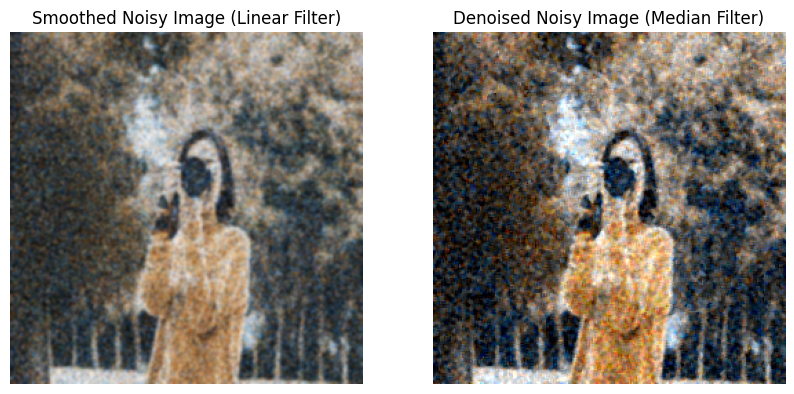

In [23]:
### WRITE CODE IN HERE. ##############################################################################
# Median filter - reduces noise while preserving edges and fine details.
from scipy.ndimage import median_filter

# Apply Median filter to the noisy image
denoised_median = median_filter(noisy_image, size=3)  # Using a neighborhood size of 3x3

# Display the denoised images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(filtered_image, cmap='gray')
axes[0].set_title('Smoothed Noisy Image (Linear Filter)')
axes[0].axis('off')
axes[1].imshow(denoised_median, cmap='gray')
axes[1].set_title('Denoised Noisy Image (Median Filter)')
axes[1].axis('off')
plt.show()

######################################################################################################

**Answer:** YOUR WRITTEN ANSWER TO QUESTION 1j HERE  

## Problem 2: Geometric Features (25 points)

As you may know, the geometric features of a tumor can sometimes reveal significant information about whether it is benign or malignant. Radiologists frequently [assess the geometry of lesions in mammograms](https://www.sciencedirect.com/science/article/pii/S2211568413003872) when attempting to diagnose breast cancer.

In this exercise, we will attempt to explore some **quantitative** methods of differentiating between certain lesion shapes.

Download the two mammograms from Teams Files. [`LEFT_CC_BENIGN.tif`](https://imcfhkrems.sharepoint.com/:i:/r/teams/LV_66620/Freigegebene%20Dokumente/General/Exercise%202/LEFT_CC_BENIGN.tif?csf=1&web=1&e=1qOdKn) depicts a cranial-caudal view (looking down on the breast from the patient's perspective) of the left breast. There is a benign lesion present in the mammogram. Can you locate it? 

If you are having difficulty locating the lesion, try seeing if you can spot it in the mask [`LEFT_CC_BENIGN_MASK.tif`](https://imcfhkrems.sharepoint.com/:i:/r/teams/LV_66620/Freigegebene%20Dokumente/General/Exercise%202/LEFT_CC_BENIGN_MASK.tif?csf=1&web=1&e=kf8uUt), which consists of a rough segmentation of the lesion. [`RIGHT_CC_MALIGNANT.tif`](https://imcfhkrems.sharepoint.com/:i:/r/teams/LV_66620/Freigegebene%20Dokumente/General/Exercise%202/RIGHT_CC_MALIGNANT.tif?csf=1&web=1&e=jdFP9X) and [`RIGHT_CC_MALIGNANT_MASK.tif`](https://imcfhkrems.sharepoint.com/:i:/r/teams/LV_66620/Freigegebene%20Dokumente/General/Exercise%202/RIGHT_CC_MALIGNANT_MASK.tif?csf=1&web=1&e=dJTJ0n) are the mammogram and corresponding lesion segmentation of a different patient, but this mammogram depicts a breast with a **malignant** tumor.

**a.** Start by loading these two mammograms and their corresponding masks as image matrices. 
Plot them on a single figure (e.g., using a 2-by-2 grid of subplots, or merge the mask as a semi transparent/colored layer). You should use reasonable **x** and **y** limits in your figures to get a reasonable depiction of your lesion segmentations.

Qualitatively describe the shape differences between the two lesions. What types of shapes and margins are indicative of malignant tumors?

In [31]:
! pip install open

ERROR: Could not find a version that satisfies the requirement open (from versions: none)
ERROR: No matching distribution found for open


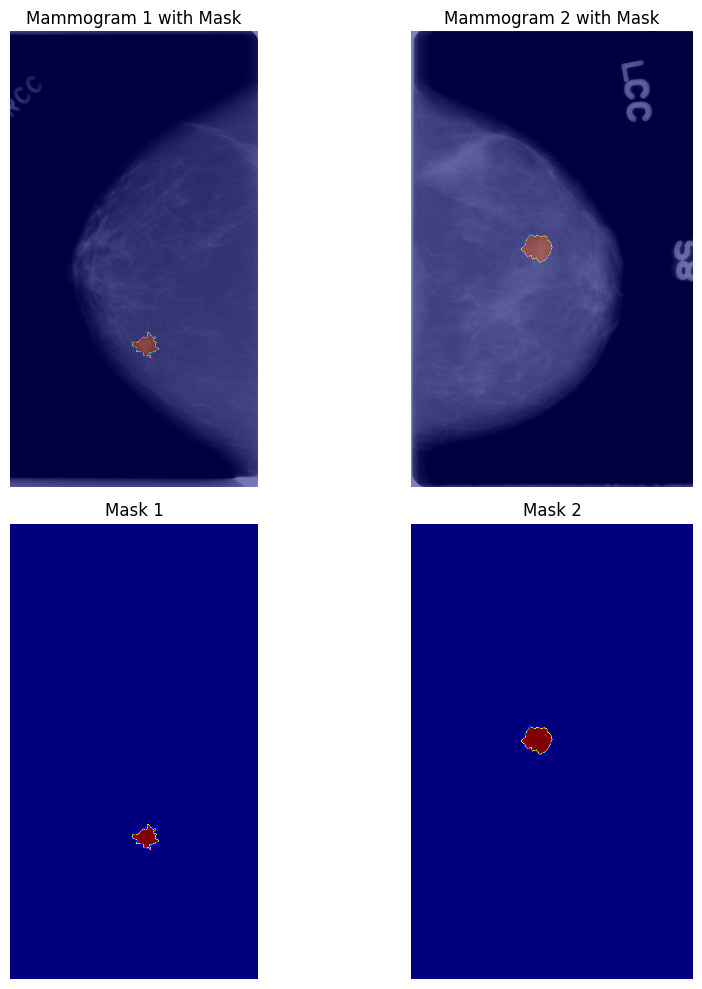

In [6]:
### WRITE CODE IN HERE. You can have up to 2 cells for this question, but only one is required #######

import cv2
import matplotlib.pyplot as plt

# Load the mammograms and their corresponding masks using OpenCV
mammogram1 = cv2.imread('RIGHT_CC_MALIGNANT.tif', cv2.IMREAD_GRAYSCALE)
mask1 = cv2.imread('RIGHT_CC_MALIGNANT_MASK.tif', cv2.IMREAD_GRAYSCALE)
mammogram2 = cv2.imread('LEFT_CC_BENIGN.tif', cv2.IMREAD_GRAYSCALE)
mask2 = cv2.imread('LEFT_CC_BENIGN_MASK.tif', cv2.IMREAD_GRAYSCALE)

# Plot the images
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Plot mammogram1 and its mask
axes[0, 0].imshow(mammogram1, cmap='gray')
axes[0, 0].imshow(mask1, cmap='jet', alpha=0.5)
axes[0, 0].set_title('Mammogram 1 with Mask')
axes[0, 0].axis('off')

# Plot mammogram2 and its mask
axes[0, 1].imshow(mammogram2, cmap='gray')
axes[0, 1].imshow(mask2, cmap='jet', alpha=0.5)
axes[0, 1].set_title('Mammogram 2 with Mask')
axes[0, 1].axis('off')

# Plot masks only
axes[1, 0].imshow(mask1, cmap='jet')
axes[1, 0].set_title('Mask 1')
axes[1, 0].axis('off')

axes[1, 1].imshow(mask2, cmap='jet')
axes[1, 1].set_title('Mask 2')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

######################################################################################################


**Answer:** YOUR WRITTEN ANSWER TO QUESTION 2a HERE  

**b.** Next, try computing some basic geometric features of the two lesions. Which features are the most significant for differentiating between them? Is this what you expected? The [`regionprops()`](https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_regionprops.html) function in the `skimage` library will automatically compute several geometric features for you, but you might choose to code up some of your own. If you don't trust the provided segmentations, feel free to create your segmentation method or modify the provided ones to get a better estimate of the lesion shapes!  
Finally, it could be interesting to apply some edge-detection filters to the mammograms to better emphasize the margins. 

You can also test your approach on other mammograms from a [larger dataset (~20 GB)](https://imcfhkrems.sharepoint.com/:f:/r/teams/LV_62825/Class%20Materials/Exercise%202?csf=1&web=1&e=X41LBH). You will need these mammograms for the next problem set (deep-learning), so there's no harm in downloading the images now!

**There is no single correct answer for this exercise, and you should definitely try several different approaches and explore!**

## Problem 3: Tumor Classification (50 Points)

In addition to the [mammograms themselves (~20 GB)](https://imcfhkrems.sharepoint.com/:f:/r/teams/LV_62825/Class%20Materials/Exercise%202?csf=1&web=1&e=X41LBH), which is based on [this](https://wiki.cancerimagingarchive.net/display/Public/CBIS-DDSM), the dataset includes "ground-truth" segmentations and [`mass_case_description_train_set.csv`](https://imcfhkrems.sharepoint.com/:x:/r/teams/LV_66620/Freigegebene%20Dokumente/General/Exercise%202/mass_case_description_train_set.csv?d=w9374d8e3fcf14429951211d33860a248&csf=1&web=1&e=Gz5jKL), which contains metadata information about mass shapes, mass margins, assessment numbers, pathology diagnoses, and subtlety in the data. Take some time to research what all of these different fields mean and how you might utilize them in your work. Note that you don't need to use all of what is provided to you...

Here are some ideas:

1. Use the ROI’s or segmentations to extract features, and then train a classifier based on these feature table using the algorithms presented to you last year in the machine learning lectures (it doesn't have to be with deep learning).

2. Use Convolutional Neural Networks (CNNs). Feel free to use any framework or package (sklearn, pytorch, pytorch-lightning, timm, keras, Tensorflow, etc.), or create your own custom code. If you dont want to place helper functions and classes into this notebook, place them in a `.py` file in the same folder and import them into this notebook (careful not to use reserved words for this).

**a.** The delivery should be a report which includes the experiment planning, the extracted features and the results.
Try answering in your report the following questions:
- Which method(s) did you use? 
- Why did you choose these method(s)?
- What were your expectations towards these methods?
- Which method worked the best for you? Which method worked the worst? Can you think why?
- How did they perform compared to your expectations?
- Which metrics did you use? To which ones did you pay the most attention?
- How do you feel about your results? 
- How would you plan to improve your results further?  

**b.** Prepare a **presentation** based on your report, and be prepared to present your experiments and your results to the rest of the class on our upcoming session.

Please submit your slides (also possible as an exported PDF).

In [ ]:
### WRITE CODE IN HERE. You can have up to 5 cells for this question ################################












######################################################################################################